# Part I - (Prosper Loan Data Visualization)
## by (Michael Nwasunja)

## Introduction

Prosper loan is a peer-to-peer lending company based in San Francisco, Carlifornia, which provides a platform for borrowers and lenders to buy and invest in loan financing. It was founded in 2005 as the first peer-to-peer lending marketplace in the United States. Since then, Prosper has facilitated over 22 billion in loans to more than 1,330,000 people.

Through Prosper, people can invest in each other in a way that is financially and socially rewarding. Borrowers apply online for a fixed-rate, fixed-term loan between 2,000USD and 40,000USD. Individuals and institutions can invest in the loans and earn attractive returns. Prosper handles all loan servicing on behalf of the matched borrowers and investors.

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
Data dictionary to understand the variables more form this link: https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0

We are trying to answer these questions

* What factors affect a loan’s outcome status?
* What affects the borrower’s APR or interest rate?
* Are there differences between loans depending on how large the original loan amount was?



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

## Data Wrangling

In [2]:
# Load the dataset and get it's shape
loans = pd.read_csv('prosperLoanData1.csv')
loans.shape

(113937, 81)

In [3]:
# Observe the columns in the dataset
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


To get the definition of selected columns for the analysis

* ListingKey: Unique key for each listing, same value as the 'key' used in the listing object in the API.
* ListingNumber: The number that uniquely identifies the listing to the public as displayed on the website.
* ListingCreationDate: The date the listing was created.
* Term: The length of the loan expressed in months.
* LoanStatus: The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
* BorrowerAPR: The Borrower's Annual Percentage Rate (APR) for the loan.
* ProsperRating (numeric): The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009.
* ProsperRating (Alpha): The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.
* ProsperScore: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score. Applicable for loans originated after July 2009.
* ListingCategory (numeric): The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
* BorrowerState: The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.
* Occupation: The Occupation selected by the Borrower at the time they created the listing.
* EmploymentStatus: The employment status of the borrower at the time they posted the listing.
* EmploymentStatusDuration: The length in months of the employment status at the time the listing was created.
* IsBorrowerHomeowner: A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
* CurrentlyInGroup: Specifies whether or not the Borrower was in a group at the time the listing was created.
* TotalInquiries: Total number of inquiries at the time the credit profile was pulled.
* DebtToIncomeRatio: The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).
* IncomeRange: The income range of the borrower at the time the listing was created.
* StatedMonthlyIncome: The monthly income the borrower stated at the time the listing was created.
* LoanOriginalAmount: The origination amount of the loan.
* Recommendations: Number of recommendations the borrower had at the time the listing was created.
* CurrentDelinquencies: Number of accounts delinquent at the time the credit profile was pulled.
* AmountDelinquent: Dollars delinquent at the time the credit profile was pulled.

### Performing more assessment on the dataframe

I am going to select only the columns that are related to our exploration of the loan out of the 113937 rows and 81 columns. I will chose 24 columns to investigate. These columns are related to the amount of loan, dates, rates and other charactrestics about the borrowers.

In [4]:
df_loans = ['ListingKey', 'ListingNumber','ListingCreationDate', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR',
                         'BorrowerRate', 'LenderYield', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)',
                         'BorrowerState', 'Occupation', 'EmploymentStatus', 'AmountDelinquent',
                         'IncomeRange', 'StatedMonthlyIncome',
                         'LoanCurrentDaysDelinquent',
                         'LoanOriginalAmount', 'LoanOriginationDate', 
                         'MonthlyLoanPayment', 'LP_ServiceFees', 'Investors']
# confirm the length of the list (columns)
len(df_loans)

24

In [5]:
# columns needed for the analysis
df_loans = loans.loc[:, ['ListingKey', 'ListingNumber','ListingCreationDate', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR',
                         'BorrowerRate', 'LenderYield', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)',
                         'BorrowerState', 'Occupation', 'EmploymentStatus', 'AmountDelinquent',
                         'IncomeRange', 'StatedMonthlyIncome',
                         'LoanCurrentDaysDelinquent',
                         'LoanOriginalAmount', 'LoanOriginationDate', 
                         'MonthlyLoanPayment', 'LP_ServiceFees', 'Investors']]
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 24 columns):
ListingKey                   113937 non-null object
ListingNumber                113937 non-null int64
ListingCreationDate          113937 non-null object
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
ClosedDate                   55089 non-null object
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
LenderYield                  113937 non-null float64
ProsperRating (Alpha)        84853 non-null object
ProsperScore                 84853 non-null float64
ListingCategory (numeric)    113937 non-null int64
BorrowerState                108422 non-null object
Occupation                   110349 non-null object
EmploymentStatus             111682 non-null object
AmountDelinquent             106315 non-null float64
IncomeRange                  113937 non-null object
Stated

In [6]:
# check for number of duplicate records
df_loans.duplicated().sum()

0

No duplicate records in the dataset. To investigate further, I would be checking for duplicates in listing key, listing number and the two fields combined

In [7]:
# check if there are duplicate listingkey records
sum(df_loans['ListingKey'].duplicated())

871

In [8]:
# check if there are duplicate listingNumber records
sum(df_loans['ListingNumber'].duplicated())

871

In [9]:
# check for duplicates for both fields
sum(df_loans[['ListingKey', 'ListingNumber']].duplicated())

871

871 duplicate records for listingkey and listingNumber. I will first observe all the duplicate records to check for patterns before deciding what to do with them.

In [10]:
# to observe the duplicate records
df_loans[df_loans[['ListingKey', 'ListingNumber']].duplicated(keep = False)]

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),...,EmploymentStatus,AmountDelinquent,IncomeRange,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,LP_ServiceFees,Investors
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,36,Current,NaN,0.07620,0.0629,0.0529,AA,...,Employed,0.0,"$25,000-49,999",3333.333333,0,10000,2013-12-12 00:00:00,305.54,-16.77,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,36,Current,NaN,0.07620,0.0629,0.0529,AA,...,Employed,0.0,"$25,000-49,999",3333.333333,0,10000,2013-12-12 00:00:00,305.54,-16.77,1
29,0F563597161095613517437,1051243,2013-12-17 09:18:33.220000000,36,Current,NaN,0.15223,0.1239,0.1139,A,...,Employed,0.0,"$100,000+",10416.666667,0,35000,2014-01-16 00:00:00,1169.03,-29.73,1
176,106335993636414276CB477,1119836,2014-01-08 14:27:50.320000000,36,Current,NaN,0.32446,0.2850,0.2750,E,...,Employed,0.0,"$75,000-99,999",6250.000000,0,4000,2014-01-16 00:00:00,166.54,-3.40,5
313,09233589620788733CFB8CE,930842,2013-09-25 08:03:11.860000000,36,Current,NaN,0.19144,0.1550,0.1450,B,...,Self-employed,0.0,"$100,000+",13333.333333,0,15000,2013-11-18 00:00:00,523.66,-36.97,169
349,313635901230654318A9030,931467,2013-09-26 18:50:29.053000000,36,Current,NaN,0.17090,0.1349,0.1249,B,...,Other,0.0,"$1-24,999",2000.000000,0,4000,2013-10-01 00:00:00,135.72,-15.40,1
442,09AD35918712001025AC1BD,969821,2013-10-24 13:21:31.607000000,36,Current,NaN,0.20524,0.1685,0.1585,C,...,Employed,0.0,"$100,000+",12916.666667,0,5000,2013-12-23 00:00:00,177.89,-8.41,1
444,09CD3592594126374FB0A7C,986199,2013-10-18 08:28:03.610000000,36,Current,NaN,0.22773,0.1905,0.1805,C,...,Employed,0.0,"$100,000+",8333.333333,0,25000,2013-12-16 00:00:00,917.03,-42.03,1
455,31C73597152310464749E00,1092437,2013-12-23 13:47:35.500000000,36,Current,NaN,0.17151,0.1355,0.1255,B,...,Employed,0.0,"$25,000-49,999",2203.666667,0,4000,2014-01-07 00:00:00,135.84,-6.40,1
461,44F2358557406858060EBDE,870200,2013-08-15 07:12:49.410000000,60,Current,NaN,0.18965,0.1660,0.1560,C,...,Employed,0.0,"$25,000-49,999",4000.000000,0,15000,2013-10-08 00:00:00,369.57,-49.69,1


On close observation of the records with duplicate ListingKey and ListingNumber, I observed that other columns such as ListingCreationDate, BorrowerAPR etc have different values for each duplicate records. I will keep the records and use them for my analysis.

ListingKey                       0
ListingNumber                    0
ListingCreationDate              0
Term                             0
LoanStatus                       0
ClosedDate                   58848
BorrowerAPR                     25
BorrowerRate                     0
LenderYield                      0
ProsperRating (Alpha)        29084
ProsperScore                 29084
ListingCategory (numeric)        0
BorrowerState                 5515
Occupation                    3588
EmploymentStatus              2255
AmountDelinquent              7622
IncomeRange                      0
StatedMonthlyIncome              0
LoanCurrentDaysDelinquent        0
LoanOriginalAmount               0
LoanOriginationDate              0
MonthlyLoanPayment               0
LP_ServiceFees                   0
Investors                        0
dtype: int64


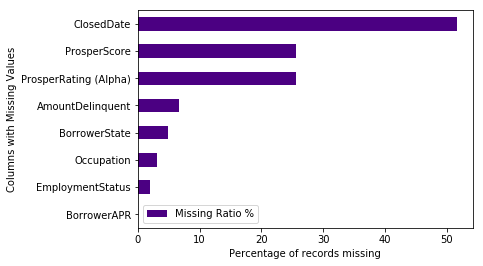

In [11]:
# to check for null values in each columns
null = df_loans.isna().sum()
print(null)

# creating a function to plot the number of null values
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending= True)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh", color = "indigo")
        plt.ylabel("Columns with Missing Values", fontsize = 10)
        plt.xlabel("Percentage of records missing", fontsize = 10)
        plt.show()
    else:
        print('No NAs found')
        

plot_nas(df_loans)
plot_width, plot_height = (10, 10)
plt.rcParams['figure.figsize'] = (plot_width, plot_height)

From the chart above, ClosedDate has the most missing values with over 50% of the records missing.

In [12]:
# to check for the number of unique records for each columns 
df_loans.nunique()

ListingKey                   113066
ListingNumber                113066
ListingCreationDate          113064
Term                              3
LoanStatus                       12
ClosedDate                     2802
BorrowerAPR                    6677
BorrowerRate                   2294
LenderYield                    2283
ProsperRating (Alpha)             7
ProsperScore                     11
ListingCategory (numeric)        21
BorrowerState                    51
Occupation                       67
EmploymentStatus                  8
AmountDelinquent               7059
IncomeRange                       8
StatedMonthlyIncome           13502
LoanCurrentDaysDelinquent      2411
LoanOriginalAmount             2468
LoanOriginationDate            1873
MonthlyLoanPayment            23567
LP_ServiceFees                19813
Investors                       751
dtype: int64

In [13]:
# check the descriptive statistics of the numerical columns in the dataframe
df_loans.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,ListingCategory (numeric),AmountDelinquent,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,MonthlyLoanPayment,LP_ServiceFees,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,113937.000000,106315.000000,1.139370e+05,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,5.950067,2.774209,984.507059,5.608026e+03,152.816539,8337.01385,272.475783,-54.725641,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,2.376501,3.996797,7158.270157,7.478497e+03,466.320254,6245.80058,192.697812,60.675425,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,1000.00000,0.000000,-664.870000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,4.000000,1.000000,0.000000,3.200333e+03,0.000000,4000.00000,131.620000,-73.180000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,6.000000,1.000000,0.000000,4.666667e+03,0.000000,6500.00000,217.740000,-34.440000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,8.000000,3.000000,0.000000,6.825000e+03,0.000000,12000.00000,371.580000,-13.920000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,11.000000,20.000000,463881.000000,1.750003e+06,2704.000000,35000.00000,2251.510000,32.060000,1189.000000


In [14]:
# check the datatype of the columns
df_loans.dtypes

ListingKey                    object
ListingNumber                  int64
ListingCreationDate           object
Term                           int64
LoanStatus                    object
ClosedDate                    object
BorrowerAPR                  float64
BorrowerRate                 float64
LenderYield                  float64
ProsperRating (Alpha)         object
ProsperScore                 float64
ListingCategory (numeric)      int64
BorrowerState                 object
Occupation                    object
EmploymentStatus              object
AmountDelinquent             float64
IncomeRange                   object
StatedMonthlyIncome          float64
LoanCurrentDaysDelinquent      int64
LoanOriginalAmount             int64
LoanOriginationDate           object
MonthlyLoanPayment           float64
LP_ServiceFees               float64
Investors                      int64
dtype: object

In [15]:
df_loans.head()

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),...,EmploymentStatus,AmountDelinquent,IncomeRange,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,LP_ServiceFees,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,...,Self-employed,472.0,"$25,000-49,999",3083.333333,0,9425,2007-09-12 00:00:00,330.43,-133.18,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,36,Current,NaN,0.12016,0.0920,0.0820,A,...,Employed,0.0,"$50,000-74,999",6125.000000,0,10000,2014-03-03 00:00:00,318.93,0.00,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,...,Not available,NaN,Not displayed,2083.333333,0,3001,2007-01-17 00:00:00,123.32,-24.20,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,36,Current,NaN,0.12528,0.0974,0.0874,A,...,Employed,10056.0,"$25,000-49,999",2875.000000,0,10000,2012-11-01 00:00:00,321.45,-108.01,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,36,Current,NaN,0.24614,0.2085,0.1985,D,...,Employed,0.0,"$100,000+",9583.333333,0,15000,2013-09-20 00:00:00,563.97,-60.27,20


In [16]:
# The datatype of ListingCreationDate, CloseDate and LoanOriginationDate has to be chnaged to Datetime
df_loans['ListingCreationDate'] = pd.to_datetime(df_loans['ListingCreationDate']) 
df_loans['ClosedDate'] = pd.to_datetime(df_loans['ClosedDate'])
df_loans['LoanOriginationDate'] = pd.to_datetime(df_loans['LoanOriginationDate'])

# check if the changes were made
df_loans.dtypes

ListingKey                           object
ListingNumber                         int64
ListingCreationDate          datetime64[ns]
Term                                  int64
LoanStatus                           object
ClosedDate                   datetime64[ns]
BorrowerAPR                         float64
BorrowerRate                        float64
LenderYield                         float64
ProsperRating (Alpha)                object
ProsperScore                        float64
ListingCategory (numeric)             int64
BorrowerState                        object
Occupation                           object
EmploymentStatus                     object
AmountDelinquent                    float64
IncomeRange                          object
StatedMonthlyIncome                 float64
LoanCurrentDaysDelinquent             int64
LoanOriginalAmount                    int64
LoanOriginationDate          datetime64[ns]
MonthlyLoanPayment                  float64
LP_ServiceFees                  

In [17]:
# to check the shape of the subset dataframe
df_loans.shape

(113937, 24)

In [18]:
# Convert ProsperRating & IncomeRange to ordinal categorical 
ordinal_var_dict = {'ProsperRating (Alpha)': ['N/A','HR','E','D','C', 'B', 'A', 'AA'],
                    'IncomeRange':['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']}
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    df_loans[var] = df_loans[var].astype(ordered_var)

df_loans['ProsperRating (Alpha)'].value_counts()

C      18345
B      15581
A      14551
D      14274
E       9795
HR      6935
AA      5372
N/A        0
Name: ProsperRating (Alpha), dtype: int64

In [19]:
df_loans['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
$1-24,999          7274
$0                  621
Name: IncomeRange, dtype: int64

In [20]:
#Adjust datatype for all other categorical columns
df_loans['Occupation'] = df_loans['Occupation'].astype('category')
df_loans['BorrowerState'] = df_loans['BorrowerState'].astype('category')
df_loans['LoanStatus'] = df_loans['LoanStatus'].astype('category')
df_loans['ListingCategory (numeric)'] = df_loans['ListingCategory (numeric)'].astype('category')
df_loans['EmploymentStatus'] = df_loans['EmploymentStatus'].astype('category')

In [21]:
df_loans['Occupation'].value_counts()

Other                                 28617
Professional                          13628
Computer Programmer                    4478
Executive                              4311
Teacher                                3759
Administrative Assistant               3688
Analyst                                3602
Sales - Commission                     3446
Accountant/CPA                         3233
Clerical                               3164
Sales - Retail                         2797
Skilled Labor                          2746
Retail Management                      2602
Nurse (RN)                             2489
Construction                           1790
Truck Driver                           1675
Laborer                                1595
Police Officer/Correction Officer      1578
Civil Service                          1457
Engineer - Mechanical                  1406
Military Enlisted                      1272
Food Service Management                1239
Engineer - Electrical           

In [22]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 24 columns):
ListingKey                   113937 non-null object
ListingNumber                113937 non-null int64
ListingCreationDate          113937 non-null datetime64[ns]
Term                         113937 non-null int64
LoanStatus                   113937 non-null category
ClosedDate                   55089 non-null datetime64[ns]
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
LenderYield                  113937 non-null float64
ProsperRating (Alpha)        84853 non-null category
ProsperScore                 84853 non-null float64
ListingCategory (numeric)    113937 non-null category
BorrowerState                108422 non-null category
Occupation                   110349 non-null category
EmploymentStatus             111682 non-null category
AmountDelinquent             106315 non-null float64
IncomeRange                  

In [23]:
df_loans.head()

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),...,EmploymentStatus,AmountDelinquent,IncomeRange,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,LP_ServiceFees,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,36,Completed,2009-08-14,0.16516,0.1580,0.1380,NaN,...,Self-employed,472.0,"$25,000-49,999",3083.333333,0,9425,2007-09-12,330.43,-133.18,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,36,Current,NaT,0.12016,0.0920,0.0820,A,...,Employed,0.0,"$50,000-74,999",6125.000000,0,10000,2014-03-03,318.93,0.00,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090,36,Completed,2009-12-17,0.28269,0.2750,0.2400,NaN,...,Not available,NaN,NaN,2083.333333,0,3001,2007-01-17,123.32,-24.20,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,36,Current,NaT,0.12528,0.0974,0.0874,A,...,Employed,10056.0,"$25,000-49,999",2875.000000,0,10000,2012-11-01,321.45,-108.01,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,36,Current,NaT,0.24614,0.2085,0.1985,D,...,Employed,0.0,"$100,000+",9583.333333,0,15000,2013-09-20,563.97,-60.27,20


### What is the structure of your dataset?

The dataset contains 113937 rows and 24 columns. Most of the columns are numeric but we also have categorical variables(both ordinal and nominal) and datetime variables.

### What is/are the main feature(s) of interest in your dataset?

I will work with Borrower Rate, Borrower APR, Prosper Score, Credit Score, Original Loan Amount, Monthly Payment, Borrower Occupation, Borrower State and others if needed.

There are some important features to look at including:

    * ProsperScore: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best,or - lowest risk score. Applicable for loans originated after July 2009.
    * BorrowerAPR: The Borrower's Annual Percentage Rate (APR) for the loan.
    * LoanOriginationDate: The date the loan was originated.
    * LenderYield: The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think Loan Status and Employment Status will have a strong impact on loan and the features we are trying to explore. Also the Monthly Income will play a role here and the Term (lenght of the loan) may have an effect. So I will try to investigate these more.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


I will start with the most important features: Prosper Score, Borrower APR and Loan Original Amount

### Question: What is the distribution of Prosper Score?

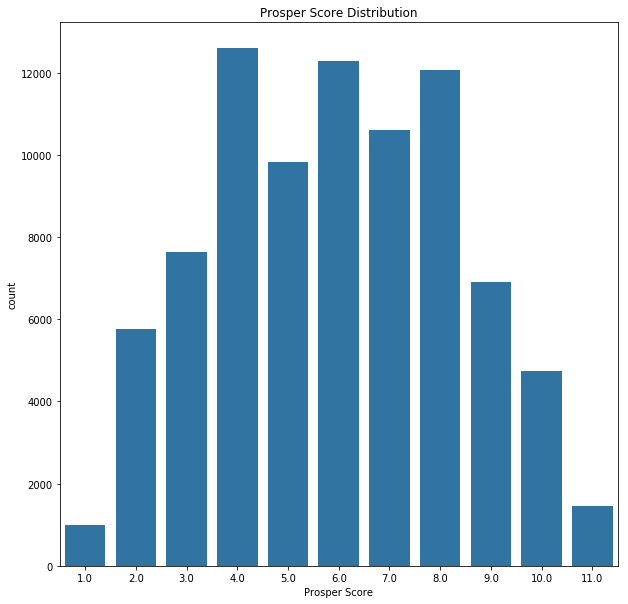

In [24]:
#Prosper Score Distribution (range form 1 to 10)
base_color = sb.color_palette()[0]
sb.countplot(data=df_loans, x= 'ProsperScore', color=base_color)
plt.title('Prosper Score Distribution')
plt.xlabel('Prosper Score');

Observation: 
Prosper Scores are almost normally distributed and values 4, 6 and 8 are the most common.

### Question: What is the distribution of Borrower APR?

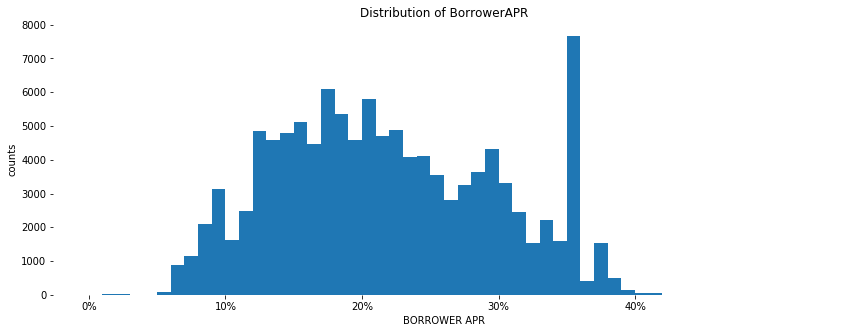

In [25]:
plt.figure(figsize = [14, 5])

# Create bin sizes
bins = np.arange(0, loans.BorrowerAPR.max()+0.01, 0.01)

# Plot distribution of BorrowerAPR
plt.hist(data=loans, x='BorrowerAPR', bins=bins, range=(bins.min(),bins.max()))
plt.xlabel('BORROWER APR')
plt.ylabel('counts')
sb.despine(left=True, bottom=True)
plt.xticks([0.0, 0.1, 0.2, 0.3, 0.4], ['0%', '10%', '20%', '30%', '40%'])
plt.title("Distribution of BorrowerAPR");

Observation: Borrower APR is normally distrubuted with the peak between 15 and 20 percent in addition we have the major increase around the 35 percent

### Question: What is the distribution of Loan Original Amount?

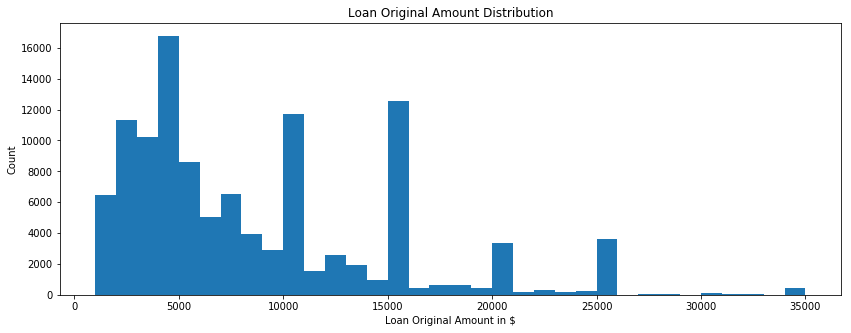

In [26]:
# Loan Original Amount Distribution
binsize = 1000
bins = np.arange(df_loans['LoanOriginalAmount'].min(), df_loans['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[14, 5])
plt.hist(data = df_loans, x = 'LoanOriginalAmount', bins = bins)
plt.title('Loan Original Amount Distribution')
plt.xlabel('Loan Original Amount in $')
plt.ylabel('Count')
plt.show()

Observation: Loan Original Amount distribution is right skewed with a long tail so I will try it in the log scale to see it more better

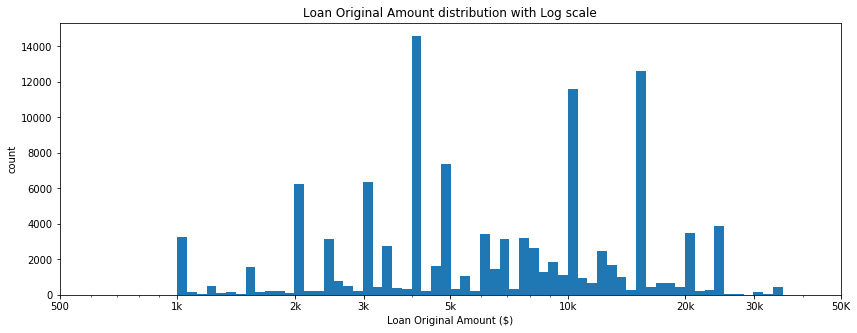

In [27]:
# Putting Loan Original Amount in a log-scale
log_binsize = 0.025
bins = 10 ** np.arange(3, np.log10(df_loans['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[14, 5])
plt.hist(data = df_loans, x = 'LoanOriginalAmount', bins = bins)
plt.title('Loan Original Amount distribution with Log scale')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3,3e3, 5e3, 1e4, 2e4, 3e4, 5e4], ['500', '1k', '2k', '3k', '5k', '10k', '20k', '30k', '50K'])
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('count')
plt.show()

Observation: The highest value for original loan amount is between 3K and 5K. Also I notice increase in amount between 10K and 20K

In [28]:
#Checking loans' term (expressed in months)
df_loans['Term'].value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

Observation: In years terms can be either 1 year (12 month) or 3 years (36 months) or 5 years (60 months)

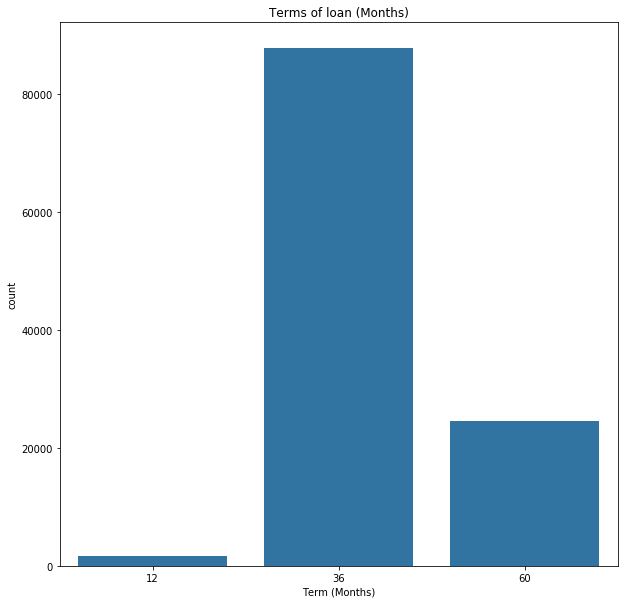

In [29]:
#Plotting terms of loan
base_color = sb.color_palette()[0]
sb.countplot(data=df_loans,x= 'Term',color=base_color);
plt.title('Terms of loan (Months)')
plt.xlabel('Term (Months)');

Observation: Most of the values are in the 3 years (36 months)

### Question: What is the service fee distribution?

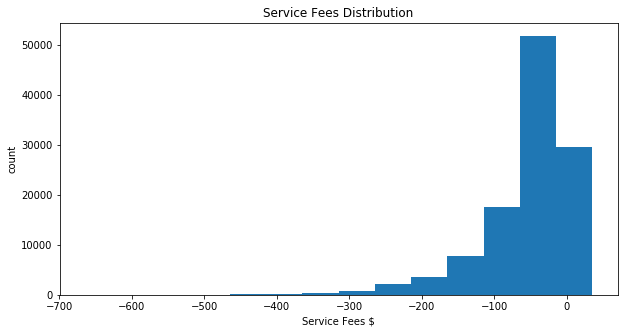

In [30]:
# Service Fees Distribution
binsize = 50
bins = np.arange(df_loans['LP_ServiceFees'].min(), df_loans['LP_ServiceFees'].max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = df_loans, x = 'LP_ServiceFees', bins = bins)
plt.xlabel('Service Fees $')
plt.title('Service Fees Distribution')
plt.ylabel('count')
plt.show()

Observation: Service fees are left skewed but we can't put it in the log scale because of the negative values.

### Question: How is Lender Yield distributed

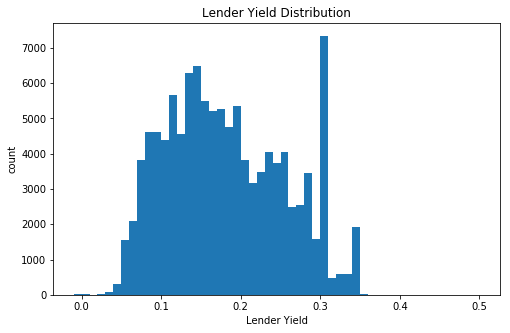

In [31]:
#Lender Yield Distribution
binsize = 0.01
bins = np.arange(df_loans['LenderYield'].min(), df_loans['LenderYield'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loans, x = 'LenderYield', bins = bins)
plt.xlabel('Lender Yield')
plt.title('Lender Yield Distribution')
plt.ylabel('count')
plt.show()

Observation: Lender Yield is nomarlly distributed with most of the values between 0.1 and 0.2 and we notice an increase at 0.3

### Question: How is Amount Delinquent distributed?

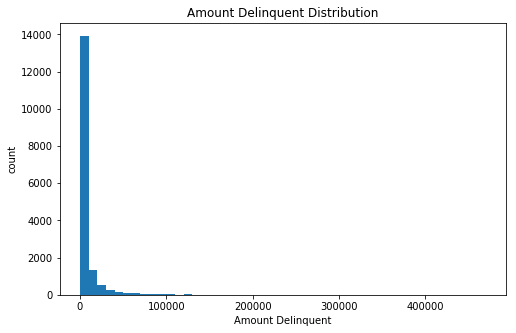

In [32]:
#Amount Delinquent Distribution
binsize = 10000
bins = np.arange(df_loans['AmountDelinquent'].min(), df_loans['AmountDelinquent'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loans[df_loans['AmountDelinquent']>0], x = 'AmountDelinquent', bins = bins)
plt.title('Amount Delinquent Distribution')
plt.xlabel('Amount Delinquent')
plt.ylabel('count')
plt.show()

Observation: Amount delinquent distribution is right-skewed

In [33]:
df_loans['AmountDelinquent'].max()

463881.0

In [34]:
df_loans['AmountDelinquent'].min()

0.0

In [35]:
df_loans['AmountDelinquent'].value_counts()

0.0         89818
50.0           73
100.0          67
25.0           66
30.0           65
75.0           56
60.0           46
40.0           43
120.0          35
55.0           34
65.0           34
15.0           34
67.0           32
150.0          32
130.0          31
10.0           30
20.0           30
35.0           29
200.0          29
70.0           29
80.0           28
33.0           27
79.0           26
45.0           26
300.0          26
54.0           26
110.0          26
68.0           25
88.0           25
90.0           25
            ...  
18239.0         1
8988.0          1
19659.0         1
4001.0          1
3706.0          1
23754.0         1
10176.0         1
3136.0          1
9974.0          1
13235.0         1
9122.0          1
13213.0         1
6114.0          1
63897.0         1
6973.0          1
2790.0          1
3482.0          1
4733.0          1
21299.0         1
6062.0          1
23759.0         1
3227.0          1
3308.0          1
5581.0          1
9964.0    

Observation: Amount Delinquent is right skewed and we can't see insights from if so let's try log scale. Also, most of the loans do not have delinquence as we saw that at 0 we have 89818. It is better checking this in log-scale

### Question: What is the distribution of Loan Current Days Delinquent

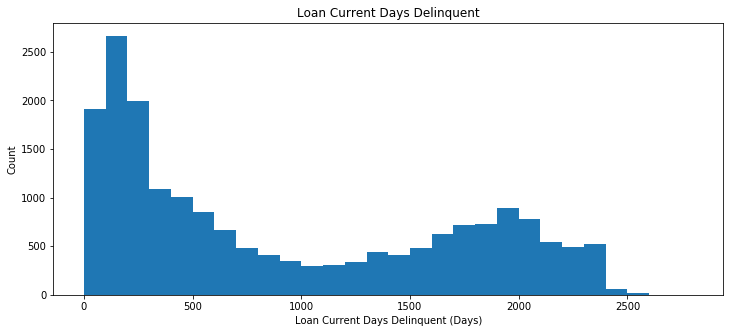

In [36]:
# Loan Current Days Delinquent Distribution
binsize = 100
bins = np.arange(0, df_loans['LoanCurrentDaysDelinquent'].max()+binsize, binsize)

plt.figure(figsize=[12, 5])
plt.hist(data = df_loans[df_loans['LoanCurrentDaysDelinquent']>0], x = 'LoanCurrentDaysDelinquent', bins = bins)
plt.title('Loan Current Days Delinquent')
plt.xlabel('Loan Current Days Delinquent (Days)')
plt.ylabel('Count')
plt.show()

Observation: Most of delinquent are on the first 500 days and the distribution is bimodal.

### Question: How is the Number of investors distributed?

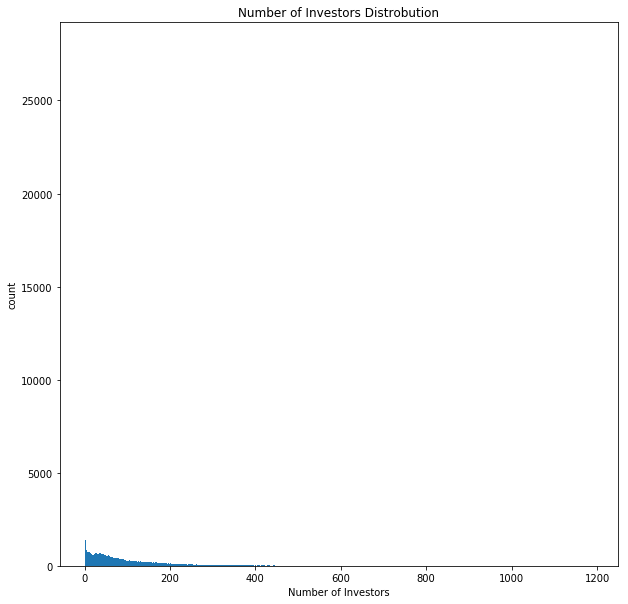

In [37]:
#Number of Investors Distrobution
binsize = 1
bins = np.arange(df_loans['Investors'].min(), df_loans['Investors'].max()+binsize, binsize)

#plt.figure(figsize=[8, 5])
plt.hist(data = df_loans[df_loans['Investors'] > 0], x = 'Investors', bins = bins)
plt.xlabel('Number of Investors')
plt.title('Number of Investors Distrobution')
plt.ylabel('count')
plt.show()

Observation: This distribution can't been seen well i will try log scale as it may work better.

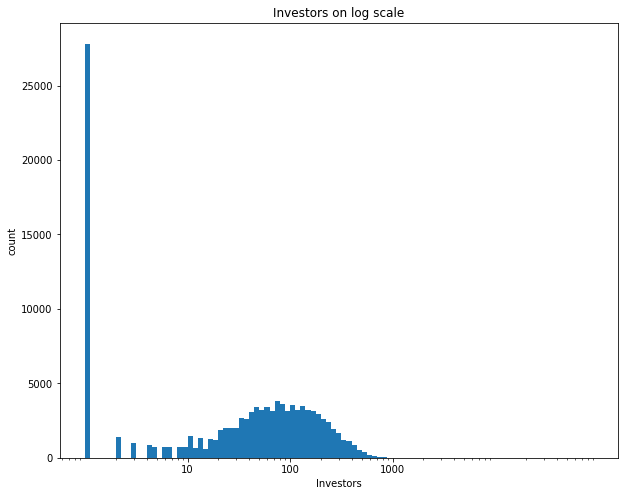

In [38]:
#Number of Investors Distrobution on log scale for all loans
log_binsize = 0.05
bins = 10 ** np.arange(0, 5, log_binsize)

plt.figure(figsize=[10, 8])
plt.hist(data = df_loans, x = 'Investors', bins = bins)
plt.title('Investors on log scale')
plt.xscale('log')
plt.xticks([1e1, 1e2, 1e3], ['10', '100', '1000'])
plt.xlabel('Investors')
plt.ylabel('count')
plt.show()

Observation: Most of loans has around 100 investors

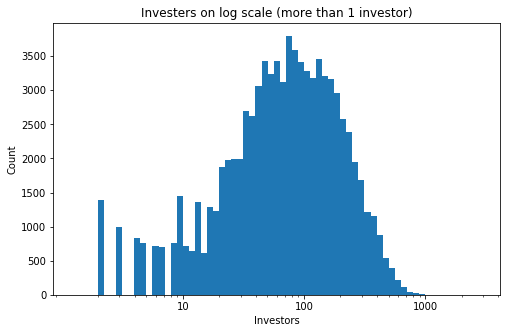

In [39]:
#We can plot the same for only loans with more than 1 investor
log_binsize = 0.05
bins = 10 ** np.arange(0.1, 3.5, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loans, x = 'Investors', bins = bins)
plt.title('Investers on log scale (more than 1 investor)')
plt.xscale('log')
plt.xticks([1e1, 1e2, 1e3], ['10', '100', '1000'])
plt.xlabel('Investors')
plt.ylabel('Count')
plt.show()

Observation: Number of investors (for data with number of investors more than 1) is almost normally distributed around 100 and that was expected from the previous one

### Question: What is the Monthly Loan Payment distribution?

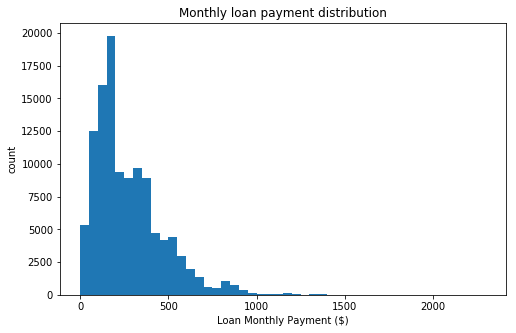

In [40]:
# Monthly loan payment distribution
binsize = 50
bins = np.arange(0, df_loans['MonthlyLoanPayment'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loans, x = 'MonthlyLoanPayment', bins = bins)
plt.xlabel('Loan Monthly Payment ($)')
plt.ylabel('count')
plt.title('Monthly loan payment distribution')
plt.show()

Observation: There's a long tail in the distribution, so let's put it on a log scale instead

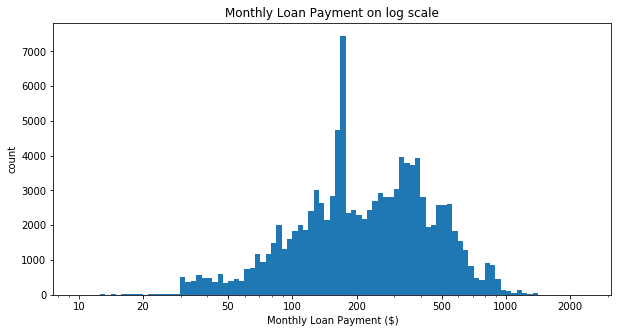

In [41]:
# Using log-scale
log_binsize = 0.025
bins = 10 ** np.arange(1, np.log10(df_loans['MonthlyLoanPayment'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = df_loans, x = 'MonthlyLoanPayment', bins = bins)
plt.xscale('log')
plt.xticks([10, 20, 50, 100, 200, 500, 1e3, 2e3], ['10', '20','50', '100', '200', '500', '1000', '2000'])
plt.xlabel('Monthly Loan Payment ($)')
plt.ylabel('count')
plt.title('Monthly Loan Payment on log scale')
plt.show()

Observation: The is normally distributed with the peak between 100 and 200 and some increase at the 500

### Question: How is the Borrower State distributed?

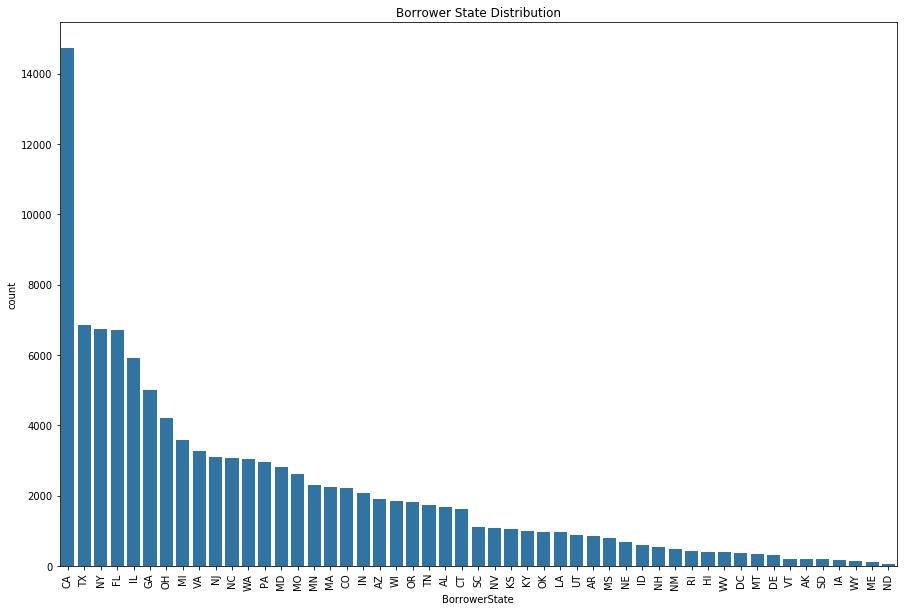

In [42]:
#Borrower State Distrobution
cat_order = df_loans['BorrowerState'].value_counts().index
plt.figure(figsize=[15, 10])
sb.countplot(data=df_loans,x='BorrowerState',color=base_color, order=cat_order);
plt.title('Borrower State Distribution');
plt.xticks(rotation=90);

Observation: We can see that California (CA), Texas (TX) and New York (NY) have the 3 biggest numbers of loans originated in that period of time.

### Question: How is Prosper Rating distributed?

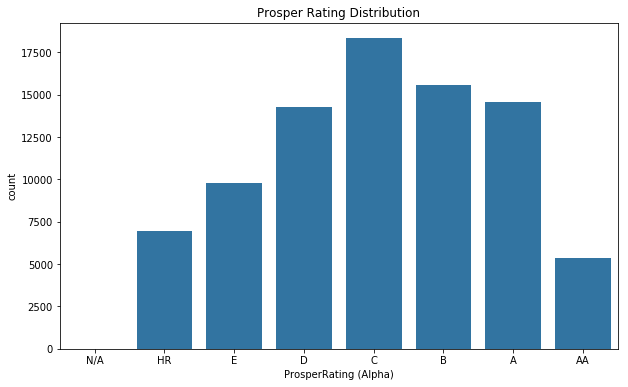

In [43]:
# Prosper Rating Distribution

plt.figure(figsize=[10, 6]);
sb.countplot(data=df_loans,x='ProsperRating (Alpha)',color=base_color);
plt.title('Prosper Rating Distribution');

Observation: Most borrowers get Prosper Rating of 'C'

### Question: How is the Loan Origination distributed by year?

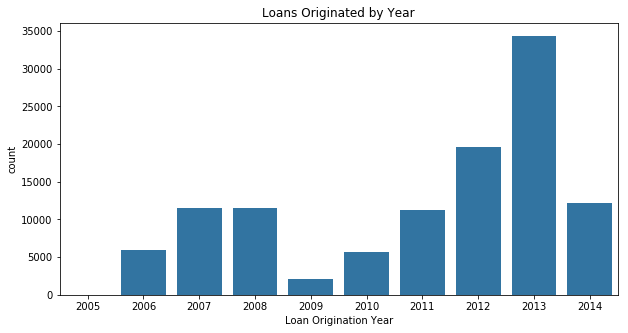

In [44]:
# Loan Origination by Year
plt.figure(figsize=[10, 5])
sb.countplot(data=df_loans,x=df_loans['LoanOriginationDate'].dt.year,color=base_color)
plt.title('Loans Originated by Year')
plt.xlabel('Loan Origination Year');

Observation: We can see that there is a drop in 2009 in loans but it started to increase gradually and reached it's peak at 2013

### Question: How is the Listing Creation distributed by year?

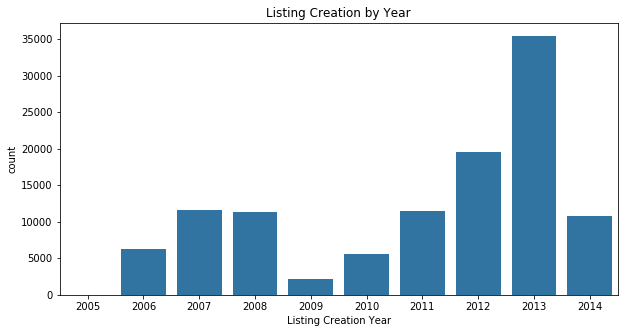

In [45]:
# Listing Creation  by Year
plt.figure(figsize=[10, 5])
sb.countplot(data=df_loans,x=df_loans['ListingCreationDate'].dt.year,color=base_color)
plt.title('Listing Creation by Year')
plt.xlabel('Listing Creation Year');

Observation: The same observation as the previous chart which is expected because we normally create the list every year.

### Question: How is the Borrower Income Range Status distributed?

Text(0.5,1,'Borrower Income Range Distribution')

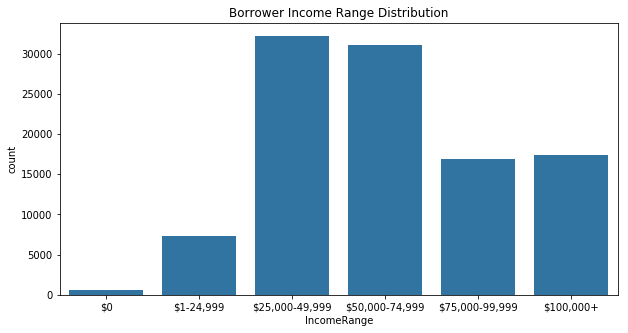

In [46]:
#Borrower Income Range Status Distrobution
plt.figure(figsize=[10, 5])
sb.countplot(data=df_loans,x='IncomeRange',color=base_color);
plt.title('Borrower Income Range Distribution')

Observation: We can see that people with income range of $25,000-74,999 are the ones who are taking loans most

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Loan Original Amount distribution is right skewed and I performed log transformation on it to interpret the visualization. I also did the log transformation to these variables: Monthly Loan Payment, Investors and Amount Delinquent.

Year 2013 had the highest loan creation. California (CA) had the biggest number of loans. Service fees was left skewed but I couldn't do the log scale because of negative values.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Due to the high difference between AmountDelinquent values the distribution was really on large scale and I couldn't see it clear so I did the log transformation.
Some features had long-tailed, skewed distributions, these were checked on a log scale to show the hidden distribution in some areas.

## Bivariate Exploration

To investigate variables in pairs, we need to identify numeric and categorical features in order to select the proper chart type.

In [47]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 24 columns):
ListingKey                   113937 non-null object
ListingNumber                113937 non-null int64
ListingCreationDate          113937 non-null datetime64[ns]
Term                         113937 non-null int64
LoanStatus                   113937 non-null category
ClosedDate                   55089 non-null datetime64[ns]
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
LenderYield                  113937 non-null float64
ProsperRating (Alpha)        84853 non-null category
ProsperScore                 84853 non-null float64
ListingCategory (numeric)    113937 non-null category
BorrowerState                108422 non-null category
Occupation                   110349 non-null category
EmploymentStatus             111682 non-null category
AmountDelinquent             106315 non-null float64
IncomeRange                  

In [48]:
numeric_variables = ['Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'ProsperScore', 
                     'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'LP_ServiceFees', 'Investors',
                    'AmountDelinquent','LoanCurrentDaysDelinquent']

In [49]:
categorical_variables = ['LoanStatus', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 
                         'EmploymentStatus', 'IncomeRange']

### Question: How does BorrowerAPR interact with Qualitative variables

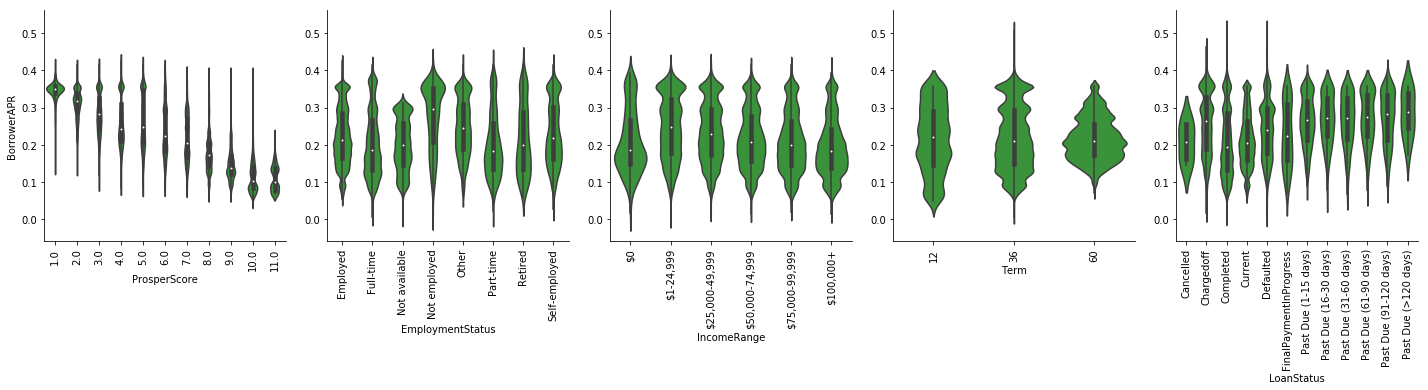

In [50]:
#define violin function
def violin(x, y, **kwargs):
    default_color = sb.color_palette()[2]
    sb.violinplot(x, y, color = default_color)
    plt.xticks(rotation=90);
    
g = sb.PairGrid(data = df_loans, y_vars = ['BorrowerAPR'], 
                x_vars = ['ProsperScore','EmploymentStatus','IncomeRange', 'Term', 'LoanStatus'], size = 4)
g.map(violin)
plt.show();

Observation:

ProsperScore/ProsperRating shows a negatie interaction with BorrowerAPR, as ProsperScores rise Borrower APR decreases. But we can also notice an undulating trend at ProsperScores 4 and 5, BorrowerAPR follows a decreasing trend up until ProsperScore of 4 then BorrowerAPR increases as ProsperScore increases from 4 to 5. this could be due to some qualitative factors like Employment Status or LoanStatus.


EmploymentStatus does not show any particular trend, it does shows Employed, Fulltiime, other and Self Employed Borrowers gain more favourable BorrowerAPR compared to NotEmployed, Retired and Part-time workers. we can look further into this

IncomeRange and ProsperRating show negative interaction with BorrowerAPR, Higher ranges of Income and ProsperRating suggests Lower values of BorrowerAPR. making IncomeRange, ProsperRating very good predictors of BorrowerAPR.

BorrowerAPR vs LoanStatus Chargedoff loans corresponds with High BorrowerAPRs, Completed LoanStatus corresponds with even lower BorrowerAPRs compared to Prior LoanStatus. Defaulted loanstatus corresponds with High BorrowerAPRs similar to Chargedoff loans. FinalPaymentinprogress have low BorrowerAPRs similar to currentloanStatus, we can explore this further with the ProsperRating.

### Question: How does BorrowerAPR interact with Quantitative variables?

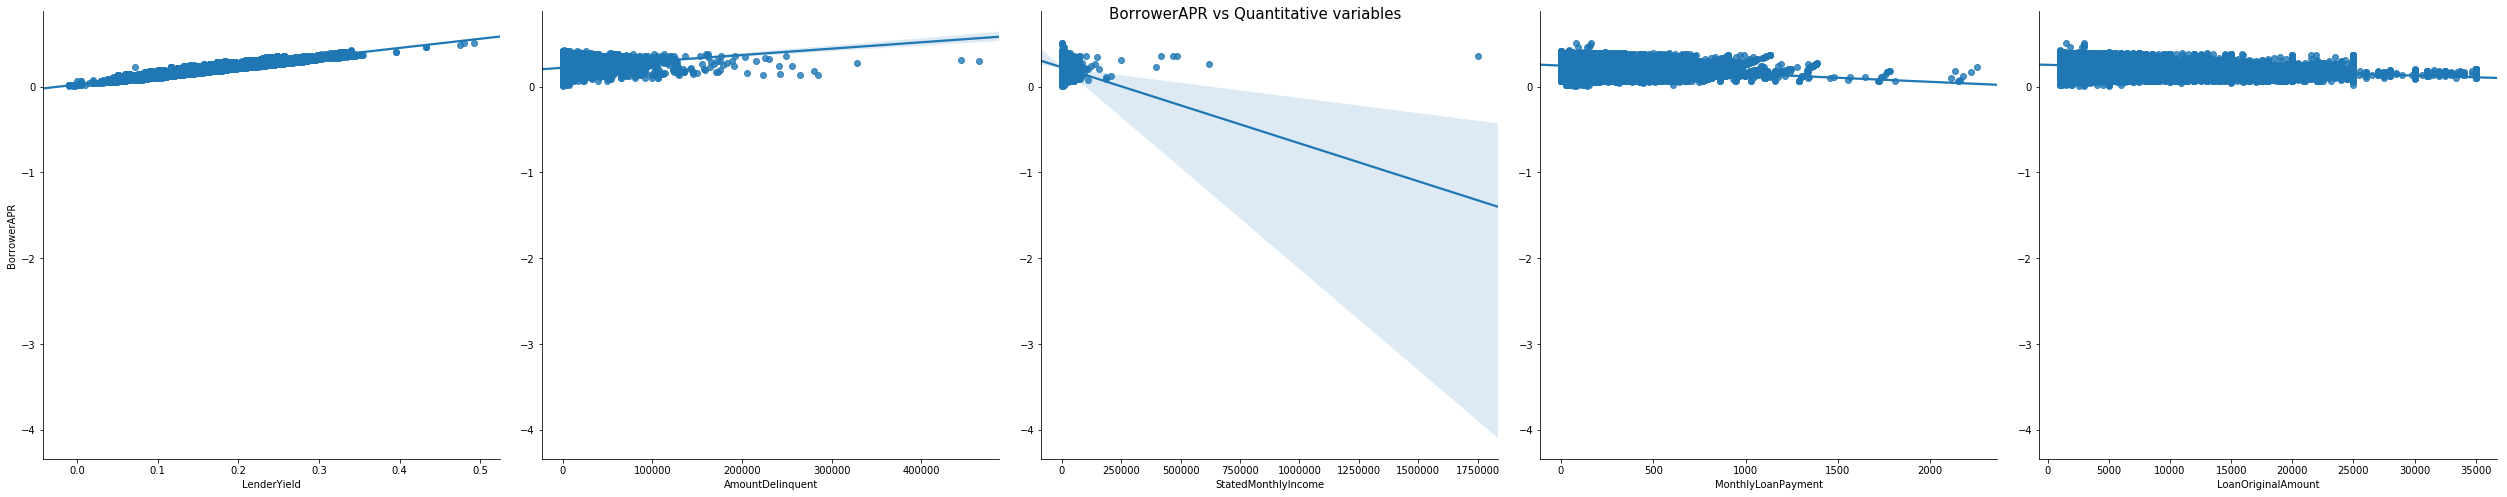

In [51]:
g = sb.PairGrid(data = df_loans, y_vars = ['BorrowerAPR'], 
                x_vars = ['LenderYield','AmountDelinquent','StatedMonthlyIncome','MonthlyLoanPayment','LoanOriginalAmount',], size = 7)
g.map(sb.regplot)
plt.suptitle('BorrowerAPR vs Quantitative variables', fontsize=15)

plt.show();

Observation:

LenderYield shows a postive interaction with BorrowerAPR. As LenderYield increases, BorrowerAPR also increases.

StatedMonthlyIncome shows a negative interaction with BorrowerAPR, with increased StatedMonthlyIncome corressponding with Lower values of BorrowerAPR, implying an effort to motivate hgih income earners to borrow.

MonthlyLoanPayment shows that at the different sizes of the total loan amount, the borrower's APR has a large distribution, but the range of APR decreases with the increase of loan amount.

LoanOriginalAmount also shows that at the different sizes of the total loan amount, the borrower's APR has a large distribution, but the range of APR decreases with the increase of loan amount. So the borrower's APR is negatively correlated with the total loan amount.


### Question: How does ProsperScore relate to categorical variables?

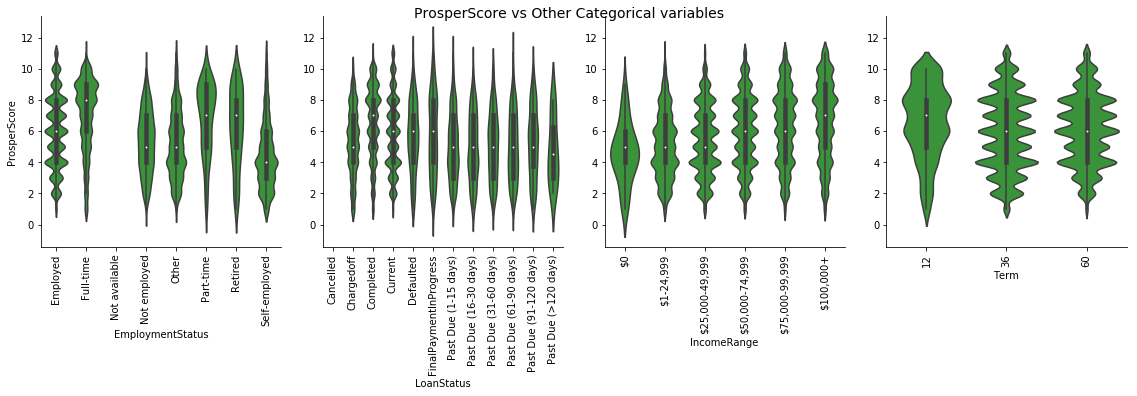

In [52]:
g = sb.PairGrid(data = df_loans, y_vars = ['ProsperScore'], x_vars = ['EmploymentStatus','LoanStatus', 'IncomeRange', 'Term'], size = 4)
g.map(violin)
plt.suptitle('ProsperScore vs Other Categorical variables', fontsize=14)
plt.show();

Observation:

EmploymentStatus shows that Part time employees have the highest range of values corresponding with very high ProsperScores. This might be due to Part-time employees taking lower loan amounts which are easier to pay off.

IncomeRange have a positive relationship with ProsperScore, a Higher IncomeRage is likely to yeild a Higher ProsperScore indicating an ability to pay off loans.

Term shows 12months LoanTerm avergage acquire higher ProsperScore(i.e Better Risk score), this could be to encourage borrowers to take smaller loans in shorter time frames which have a higher probability of being paid off. this can be explored further

In [ ]:
g = sb.PairGrid(data = df_loans, y_vars = ['ProsperScore'], 
                x_vars = ['LenderYield','StatedMonthlyIncome', 'LoanOriginalAmount', 'AmountDelinquent'], size = 4)
g.map(sb.regplot, scatter_kws={'alpha': 0.01}, x_jitter=0.04 )
plt.ylim(bottom=0, top=20)
plt.suptitle('ProsperScore vs Numerical variables', fontsize=13)
plt.xticks(rotation = 30);
plt.show();

Observation

LenderYield indicates that sharp negative relationship with ProsperScore. Low LenderYield percentage corresponds with Higer ProsperScore(Low Risk)

StatedMonthlyIncome shows that majority of listings state a monthly income between 0 and 10000USD. it also shows that as statedmonthly income increases, ProsperScore increases but statedmonthly income increases much more rapidly than ProsperScore increases. AvailbleBankcardCredit also increases with as prosperscore increases, indicating that higher AvailableBankcardCredit might have a positive interaction with ProsperScore. therefore Borrowers with high availablebankcardcredit are likely to receive high ProsperScores.

EmploymentStatusDuration appears to have no correlation with ProsperScore.

AmountDeliquent shows that lower ratios correlates with higher ProsperScores, which makes a reliable indicator for credit worthiness.

### Question: How does Numerical variables correlate with one another?

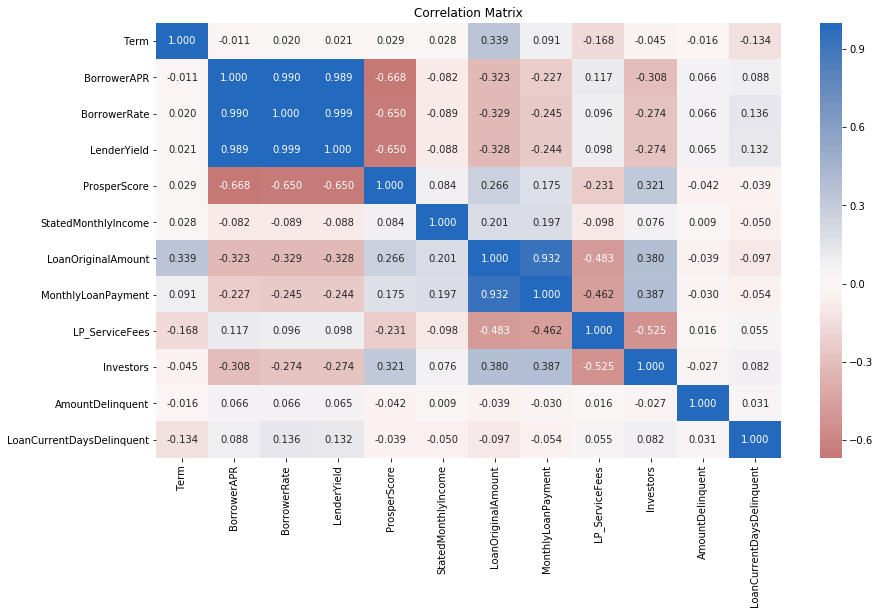

In [71]:
# Correlation matrix for all numeric variables
plt.figure(figsize = [14, 8])
sb.heatmap(df_loans[numeric_variables].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)

plt.title('Correlation Matrix') 
plt.xticks(rotation = 90);
plt.show()

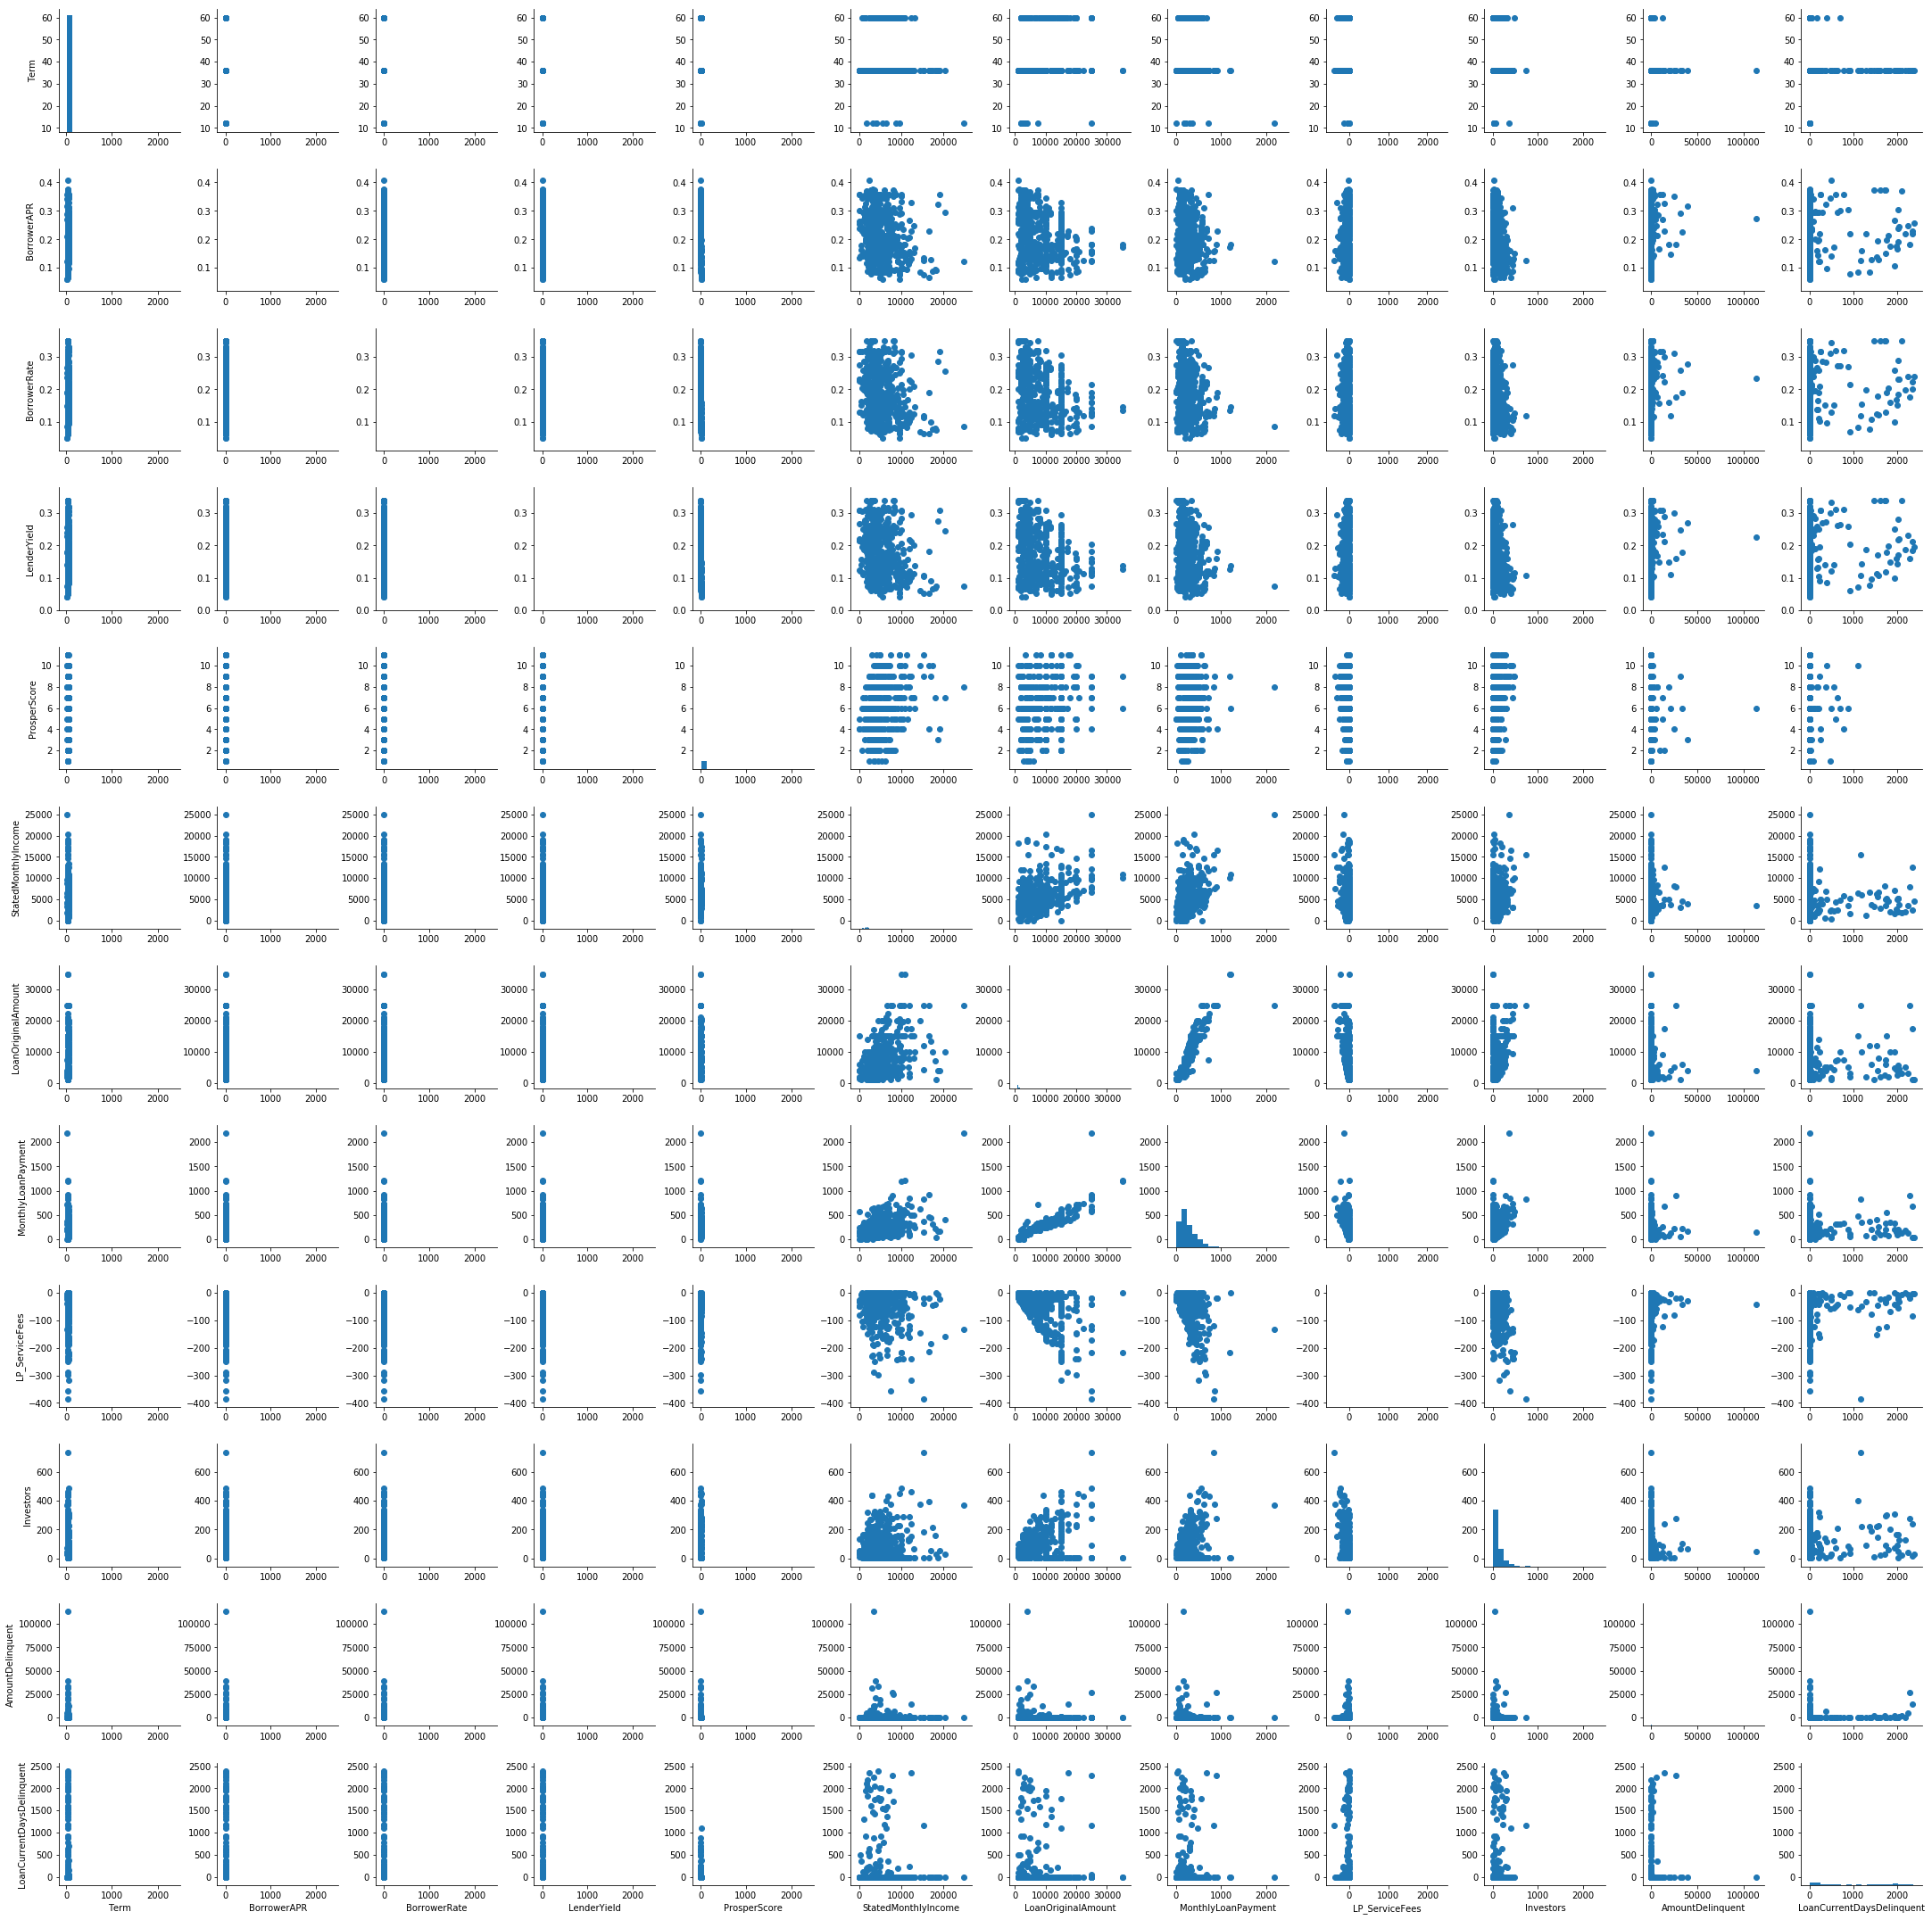

In [55]:
# plot matrix: sample 500 loans so that plots are clearer and
# they render faster
samples = np.random.choice(df_loans.shape[0], 500, replace = False)
df_loans_samp = df_loans.loc[samples,:]

g = sb.PairGrid(data = df_loans_samp, vars = numeric_variables)
g = g.map_diag(plt.hist, bins = 20,  range=(bins.min(),bins.max()));
g.map_offdiag(plt.scatter);

Observation: Strong positive correlations between Lender yield and Borrower APR. Prosper Score and Prosper Rating are also positive correlation. Credit Score upper range has also some weak +ve correlation with prosper score.

Negative correlation between prosper score & APR, and prosper score & Lender yield. Negative correlation between prosper ratings & APR, and prosper score & Lender yield

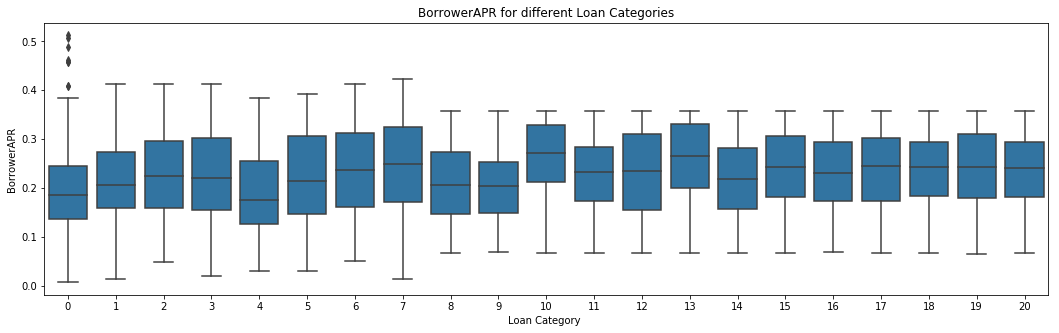

In [56]:
# BorrowerAPR for different Loan categories
plt.figure(figsize = [18, 5])

sb.boxplot(data=df_loans,y='BorrowerAPR',x='ListingCategory (numeric)',color=base_color);
plt.title('BorrowerAPR for different Loan Categories')
plt.xlabel('Loan Category ');
plt.ylabel('BorrowerAPR');

* We can see that Cosmetic Procedure are given higer interest rates with data distributed well in it.
* Listing Category: The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

From the relation between EmploymentStatus and BorrowerAPR:

People who are not employed receive high interest rate compared to the employed
The higher the income, the lower the interest rate
Original loan amount was lowest just after 2008 financial crisis, after that the amount is increasing over the year. From 2013 to 2014 , amount gets really big.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The loan status for the past dues have a high interest rate.
Number of Defaulted loans for Self-employed people are larger than those for Not Employed

## Multivariate Exploration


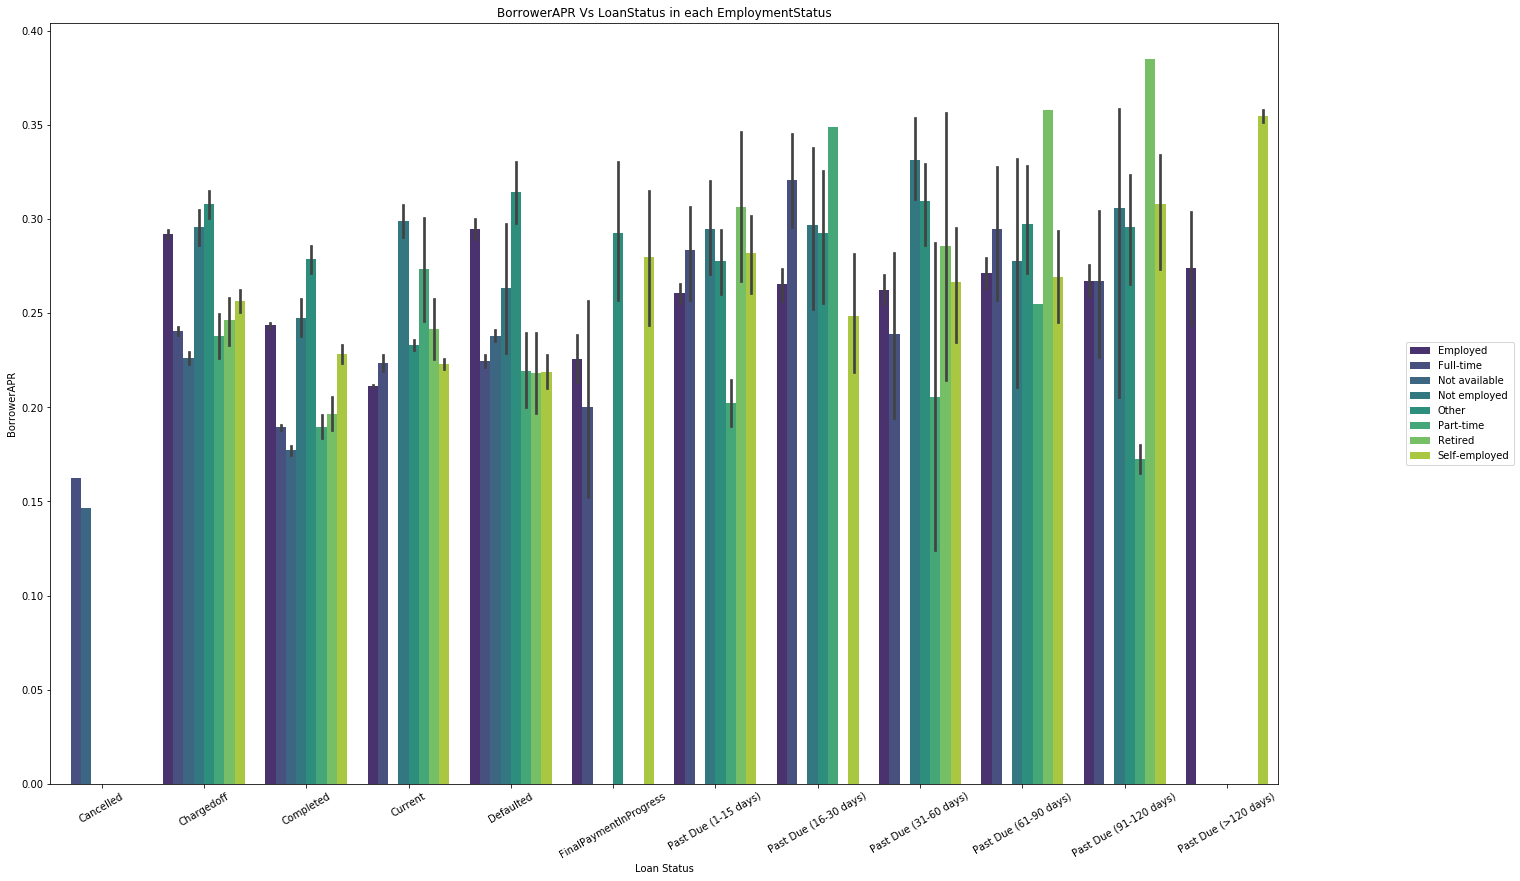

In [68]:
# LoanStatus vs BorrowerAPR
plt.figure(figsize = [22, 14]) 
sb.barplot(data=df_loans, x= 'LoanStatus', y= 'BorrowerAPR', hue='EmploymentStatus', palette='viridis');
plt.title('BorrowerAPR Vs LoanStatus in each EmploymentStatus');
plt.xlabel('Loan Status');
plt.ylabel('BorrowerAPR');
plt.xticks(rotation = 30);
plt.legend(loc=6, bbox_to_anchor=(1.1,0.5)); 

plt.show()

Observation:
* For each category of loan status, the lowest APR is for Employed and Full-time. Whereas highest APR is for Not employed.
* Most of the high BorrowerAPR are on the chargeoff, completed and current.
* We notice some outliers in chargeoff and defaulted loan status.

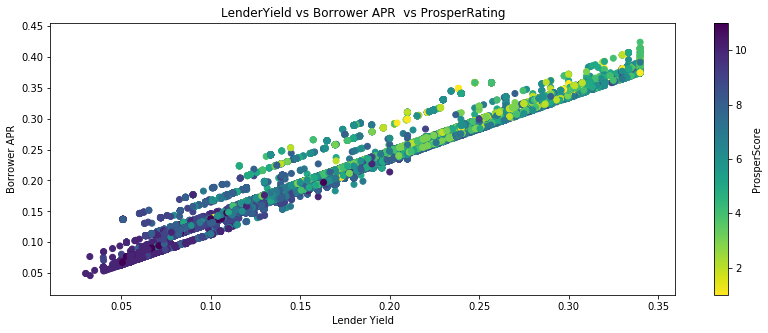

In [59]:
# LenderYield vs Borrower APR  vs ProsperRating
plt.figure(figsize = [14, 5])
plt.scatter(data=df_loans,x='LenderYield',y = 'BorrowerAPR',c='ProsperScore',cmap = 'viridis_r')
plt.colorbar(label = 'ProsperScore');
plt.title('LenderYield vs Borrower APR  vs ProsperRating');
plt.xlabel('Lender Yield');
plt.ylabel('Borrower APR');

Observation:
* We can see that the relationship between all variables are clear. Borrower APR and Lender yield are directly positively correlated as when the interest borrowers pays more , the lender yield will increase. Higher the prosper score lower will lower borrower apr and then the lender yield will also be lower.

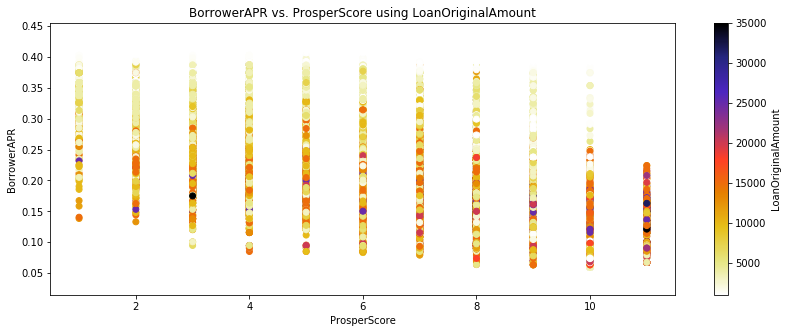

In [60]:
# BorrowerAPR vs. CreditScoreRangeUpper & CreditScoreRangeUpper
plt.figure(figsize = [14, 5]) 
cm = plt.cm.get_cmap('CMRmap_r')
plt.scatter(data=df_loans[df_loans['StatedMonthlyIncome']<20000],x='ProsperScore',y='BorrowerAPR',c='LoanOriginalAmount',cmap=cm) 
plt.colorbar(label = 'LoanOriginalAmount')
plt.title('BorrowerAPR vs. ProsperScore using LoanOriginalAmount')
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerAPR');

Observation:
* We can see that most of the loans with higher amounts (>$20,000) are taken by people with higher prosper score (10 and above)

In [61]:
df_loans['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

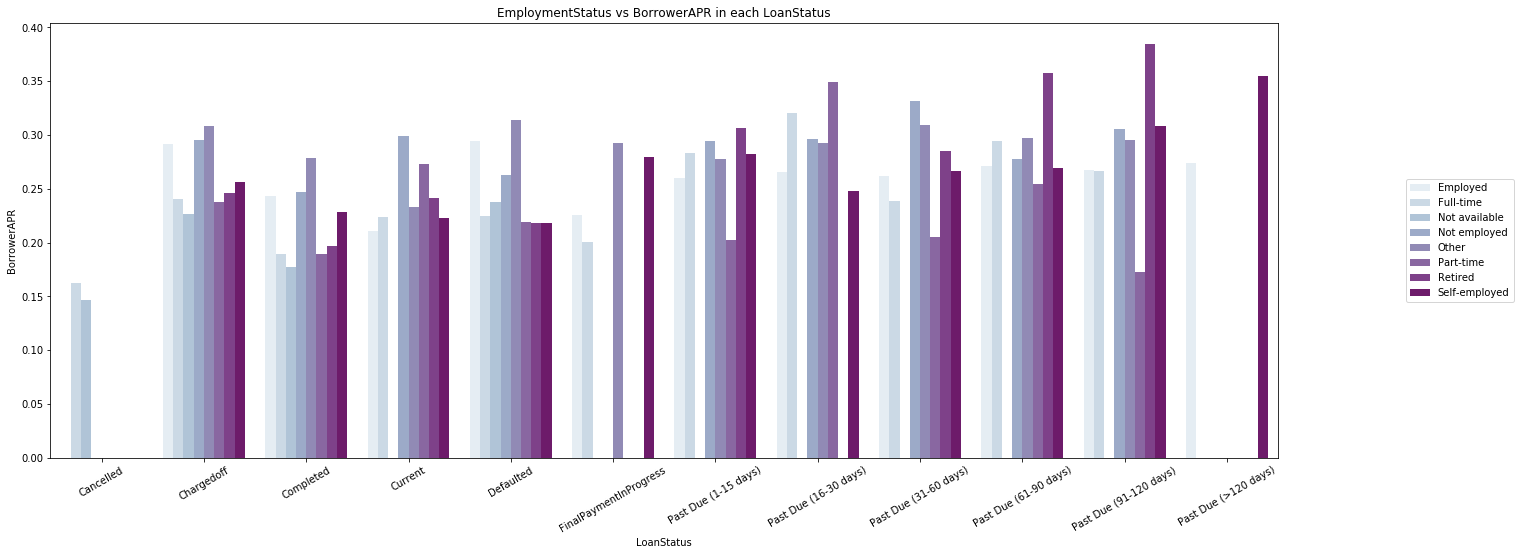

In [69]:
# EmploymentStatus vs BorrowerAPR in each LoanStatus
plt.figure(figsize=[22,8])
sb.barplot(data = df_loans, x = 'LoanStatus', y = 'BorrowerAPR', hue = 'EmploymentStatus',
            palette = 'BuPu',ci = None)
plt.title('EmploymentStatus vs BorrowerAPR in each LoanStatus')
plt.ylabel('BorrowerAPR')
plt.xticks(rotation=30)
plt.legend(loc=6, bbox_to_anchor=(1.1,0.5));
plt.show()

Observation
* Past Due loans generally have higher interest rates in all employment statuses

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Relation between EmploymentStatus, LoanStatus and BorrowerAPR:

* We see that Employed people are diverse regarding the Loan Status and BorrowerAPR as they have sometimes high borrower rate like in chargeoff and sometimes low borrower rate like in the past dues.
* Employees with Full-Time and part-time tend to have lower BorrowerAPR across all loan status categories.
* Employees with Not-Employed & Self-Employed tend to have higher BorrowerAPR in some areas like the past dues but lower BorrowerAPR in the current and completed status.

### Were there any interesting or surprising interactions between features?

Scatter plot and Heatmap were also created to find out that ProsperScore and BorrowerAPR were negatively correlated as higher the prosper score lower will be the risk attached hence lower will be the APR and that further lowers down the yield.

## Conclusions

I investigated the interactions of LoanStatus, CreditScoreRange, LoanOriginalAmounts with BorrowerAPR as an indicator of Loan favorbility, using a combination of numerical and qualitatie analysis. The following observations were made:

* Most borrowers preferred a loan Term of 36 months
* 79% of Borrowers were Employed, with 62% of Loans requested for Debt Consolidation.
* People with income range of $25,000-49,999 are the ones who are taking loans most
* California (CA), Texas (TX) and New York (NY) have the 3 biggest numbers of loans originated in that period of time.
* Most borrowers get Prosper Rating of 'C'
* There was a drop in 2009 in loans but it started to increase gradually and reached it's peak at 2013

From the Bivarite exploration of BorrowerAPR vs LoanStatus graph i noticed that Current and completed loans have lower rate than the past-due loans and have lower mean. On Borrower APR vs Employment status graph i noticed that Employed people have lower IQR than non-employed people.

Also, from Multivarite exploration, Past Due loans generally have higher interest rates in all employment statuses. Most of the loans with higher amounts (>$20,000) are taken by people with higher prosper score (10 and above)